In [1]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
PGJ_input.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [3]:
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
Alcaldias_input

,NOMBRE,CLAVE_MUNICIPAL,CVE_ENTIDAD,CVEGEO,Geo Point,Geo Shape
0,Tlalpan,12,9,9012,"19.1983396763, -99.2062207957","{""type"": ""Polygon"", ""coordinates"": [[[-99.1962..."
1,Tláhuac,11,9,9011,"19.2769983772, -99.0028216137","{""type"": ""Polygon"", ""coordinates"": [[[-98.9789..."
2,Venustiano Carranza,17,9,9017,"19.4304954545, -99.0931057959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1089..."
3,Cuauhtémoc,15,9,9015,"19.4313734294, -99.1490557562","{""type"": ""Polygon"", ""coordinates"": [[[-99.1291..."
4,Iztapalapa,7,9,9007,"19.3491663204, -99.0567989642","{""type"": ""Polygon"", ""coordinates"": [[[-99.0581..."
5,Azcapotzalco,2,9,9002,"19.4853286147, -99.1821069423","{""type"": ""Polygon"", ""coordinates"": [[[-99.1823..."
6,Benito Juárez,14,9,9014,"19.3806424162, -99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367..."
7,Cuajimalpa de Morelos,4,9,9004,"19.3246343001, -99.3107285253","{""type"": ""Polygon"", ""coordinates"": [[[-99.2569..."
8,Iztacalco,6,9,9006,"19.396911897, -99.094329797","{""type"": ""Polygon"", ""coordinates"": [[[-99.0558..."
9,Gustavo A. Madero,5,9,9005,"19.5040652077, -99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185..."


In [4]:
PGJ_input["categoria_delito"].unique()

array(['DELITO DE BAJO IMPACTO',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA', 'HECHO NO DELICTIVO',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [5]:
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A. MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
PGJ_alcaldias

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"
5,2017.0,Junio,2017-06-16 02:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,ISIDRO FABELA,TLALPAN,2017-06-19 14:12:37,Junio,2017,ANILLO PERIF. BOULEVARD ADOLFO RUIZ CORTINEZ,NaN,-99.176686,19.303028,"19.3030281171, -99.1766860005"
6,2017.0,Junio,2017-06-19 13:22:00,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COME...",DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE N...,ACD,UI-1CD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2017-06-19 14:13:11,Junio,2017,ORIENTE 144,NaN,-99.104402,19.430180,"19.4301803453, -99.1044015884"
7,2017.0,Junio,2017-06-17 15:15:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMH,UI-1CD,GUERRERO,CUAUHTEMOC,2017-06-19 14:14:36,Junio,2017,ESTACION DEL METRO HIDALGO,AL ABORDAR VAGON DEL METRO,-99.146097,19.437645,"19.4376450034, -99.146096728"
9,2017.0,Junio,2017-06-18 11:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1SD,JUAN ESCUTIA,IZTAPALAPA,2017-06-19 14:17:54,Junio,2017,JOAQUIN GUTIERREZ,NaN,-99.048867,19.395322,"19.3953224177, -99.0488673055"
11,2017.0,Junio,2017-06-18 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,SAN MIGUEL TOPILEJO,TLALPAN,2017-06-19 14:21:52,Junio,2017,AV. SANTA CRUZ,NaN,-99.144865,19.192782,"19.1927817001, -99.1448647132"


In [7]:
Primer_año=2016
Ultimo_año=2019

In [8]:
PGJ_base=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_base=PGJ_base.loc[PGJ_base["año_hechos"]<Ultimo_año+1,:]
PGJ_base.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [9]:
PGJ_Tipo_Delito=PGJ_base.groupby(["año_hechos","categoria_delito","alcaldia_hechos"]).count()
PGJ_Tipo_Delito=PGJ_Tipo_Delito["delito"]
PGJ_Tipo_Delito.head()

año_hechos  categoria_delito        alcaldia_hechos      
2016.0      DELITO DE BAJO IMPACTO  ALVARO OBREGON            9773
                                    AZCAPOTZALCO              7976
                                    BENITO JUAREZ            13662
                                    COYOACAN                 10913
                                    CUAJIMALPA DE MORELOS     2498
Name: delito, dtype: int64

In [10]:
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018.tolist()

['VIOLENCIA FAMILIAR',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'ROBO DE OBJETOS',
 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
 'FRAUDE',
 'DENUNCIA DE HECHOS',
 'AMENAZAS',
 'ROBO DE ACCESORIOS DE AUTO',
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
 'ROBO A CASA HABITACION SIN VIOLENCIA',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
 'NARCOMENUDEO POSESION SIMPLE',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
 'ABUSO DE CONFIANZA',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'DESPOJO',
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
 'LESIONES INTENCIONALES POR GOLPES',
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
 'USURPACIÓN DE IDENTIDAD',
 'ABUSO SEXUAL',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
 'ROBO DE DIN

In [11]:
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]
PGJ_2016.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
21,2016.0,Mayo,2016-05-15 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,JUZGADOS CIVILES,74,UI-3SD,DOCTORES,CUAUHTEMOC,2017-06-19 15:14:41,Junio,2017,NIÑOS HEROES,NaN,-99.150106,19.421516,"19.4215162547, -99.1501062952"
76,2016.0,Julio,2016-07-01 05:53:00,DELITOS DE ABOGADOS PATRONOS Y LITIGANTES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-2,UI-1CD,PEDREGAL 2,LA MAGDALENA CONTRERAS,2017-06-19 21:11:55,Junio,2017,FLORES MAGON,NaN,-99.230669,19.306958,"19.3069582237, -99.2306688831"
100,2016.0,Enero,2016-01-01 12:00:00,LA ADMINISTRACION DE JUSTICIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-3CD,2DA AMPLIACION BARRIO SAN MIGUEL (SAN FELIPE T...,IZTAPALAPA,2016-01-01 17:02:17,Enero,2016,AGENCIA DEL MINISTERIO PUBLICO DE IZTAPALAPA 4,NaN,-99.093770,19.360840,"19.3608399998, -99.09377"
106,2016.0,Enero,2016-01-01 07:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3SD,CABEZA DE JUAREZ VII,IZTAPALAPA,2016-01-01 16:14:28,Enero,2016,FRENTE 7,NaN,-99.056421,19.372940,"19.3729399998, -99.056421"


In [12]:
PGJ_Top_Delitos_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]

#alcaldias_2017=PGJ_Top_2017.groupby(["alcaldia_hechos"]).count()
#alcaldias_2017
PGJ_Top_Delitos_2019

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
107819,2019.0,Enero,2019-01-28 21:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,CHIMALCOYOTL,TLALPAN,2019-02-12 13:31:00,Febrero,2019,CRISTOBAL COLON,NaN,-99.169195,19.274235,"19.2742348613, -99.1691947406"
107820,2019.0,Enero,2019-01-26 18:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,MIGUEL HIDALGO,TLAHUAC,2019-02-12 13:38:00,Febrero,2019,GUILLERMO PRIETO,TOMAR MORLEY,-99.041365,19.293601,"19.2936006823, -99.041365273"
107822,2019.0,Febrero,2019-02-09 16:30:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-4,UI-1SD,ATLAMAYA,ALVARO OBREGON,2019-02-12 13:45:00,Febrero,2019,CARRILES CENTRALES DE PERIFERICO EN DIRECCIÓN ...,NaN,-99.200900,19.350173,"19.3501733347, -99.2008995833"
107823,2019.0,Febrero,2019-02-10 18:50:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,SELENE 1A. SECCION,TLAHUAC,2019-02-12 13:45:00,Febrero,2019,LAGO DE LOS SUEÑOS,NaN,-99.005719,19.291441,"19.2914411005, -99.0057187997"
107824,2019.0,Enero,2019-01-29 11:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,URI-BJ-4,UI-1SD,XOCO,BENITO JUAREZ,2019-02-12 13:46:00,Febrero,2019,PUENTE DE XOCO,SAN FELIPE MAYORAZGO,-99.165951,19.362108,"19.362108422, -99.1659505692"
107825,2019.0,Febrero,2019-02-12 10:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-1CD,CULHUACÁN CTM SECCIÓN IX,COYOACAN,2019-02-12 13:46:00,Febrero,2019,SEGUNDO ANDADOR DE ROSARIO CASTELLANOS,NaN,-99.104592,19.310270,"19.3102703633, -99.1045918028"
107826,2019.0,Febrero,2019-02-12 04:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-1SD,AMPLIACIÓN EL TRIUNFO,IZTAPALAPA,2019-02-12 13:47:00,Febrero,2019,CALLE ANTROPOLOGOS,NaN,-99.118560,19.378029,"19.3780285125, -99.1185596383"
107828,2019.0,Febrero,2019-02-06 18:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,2019-02-12 14:02:00,Febrero,2019,VICTORIA DE LAS DEMOCRACIAS (ESTA ES COLONIA),NaN,-99.164066,19.470583,"19.4705830814, -99.1640664301"
107829,2019.0,Febrero,2019-02-09 11:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,LA CARBONERA,LA MAGDALENA CONTRERAS,2019-02-12 14:11:00,Febrero,2019,PARQUE DE LOS DINAMOS,NaN,-99.252733,19.298289,"19.2982891243, -99.2527328762"
107830,2019.0,Febrero,2019-02-11 07:00:00,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,SAN MIGUEL CHAPULTEPEC,MIGUEL HIDALGO,2019-02-12 14:11:00,Febrero,2019,AV. CONSTITUYENTES,NaN,-99.187756,19.413851,"19.4138505964, -99.187756222"


In [13]:
Delitos_Alcaldia_2016 = PGJ_Top_Delitos_2016.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2016

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,9890,9890,9890,9890,9890,9890,9890,9887,9788,9890,9890,9890,9863,3058,9792,9792,9792
AZCAPOTZALCO,7947,7947,7947,7947,7947,7947,7947,7945,7909,7947,7947,7947,7934,3321,7911,7911,7911
BENITO JUAREZ,13772,13772,13772,13772,13772,13772,13772,13772,13675,13772,13772,13772,13749,5969,13680,13680,13680
COYOACAN,11248,11248,11248,11248,11248,11248,11248,11248,11034,11248,11248,11248,11230,4937,11036,11036,11036
CUAJIMALPA DE MORELOS,2138,2138,2138,2138,2138,2138,2138,2138,2127,2138,2138,2138,2137,781,2127,2127,2127
CUAUHTEMOC,23819,23819,23819,23819,23819,23819,23819,23811,23251,23819,23819,23819,23759,10764,23265,23265,23265
IZTACALCO,6353,6353,6353,6353,6353,6353,6353,6314,6302,6353,6353,6353,6343,3492,6307,6307,6307
IZTAPALAPA,22010,22010,22010,22010,22010,22010,22010,21924,21706,22010,22010,22010,21955,9709,21718,21718,21718
LA MAGDALENA CONTRERAS,2425,2425,2425,2425,2425,2425,2425,2423,2406,2425,2425,2425,2421,723,2405,2405,2405


In [14]:
Delitos_Alcaldia_2017 = PGJ_Top_Delitos_2017.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2017

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,11572,11572,11572,11572,11572,11572,11572,11572,11427,11572,11572,11572,11536,3216,11445,11445,11445
AZCAPOTZALCO,9327,9327,9327,9327,9327,9327,9327,9327,9288,9327,9327,9327,9315,3411,9301,9301,9301
BENITO JUAREZ,17129,17129,17129,17129,17129,17129,17129,17129,16984,17129,17129,17129,17111,7043,17000,17000,17000
COYOACAN,12768,12768,12768,12768,12768,12768,12768,12768,12449,12768,12768,12768,12748,5453,12471,12471,12471
CUAJIMALPA DE MORELOS,2335,2335,2335,2335,2335,2335,2335,2335,2311,2335,2335,2335,2331,779,2314,2314,2314
CUAUHTEMOC,28132,28132,28132,28132,28132,28132,28132,28132,27538,28132,28132,28132,28089,10608,27574,27574,27574
IZTACALCO,7791,7791,7791,7791,7791,7791,7791,7791,7728,7791,7791,7791,7783,3671,7736,7736,7736
IZTAPALAPA,25804,25804,25804,25804,25804,25804,25804,25804,25313,25804,25804,25804,25746,10428,25346,25346,25346
LA MAGDALENA CONTRERAS,2615,2615,2615,2615,2615,2615,2615,2615,2584,2615,2615,2615,2611,632,2593,2593,2593


In [15]:
Delitos_Alcaldia_2018 = PGJ_Top_Delitos_2018.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2018

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,13625,13625,13625,13625,13625,13625,13625,13625,13493,13625,13625,13625,13568,3460,13501,13501,13501
AZCAPOTZALCO,10007,10007,10007,10007,10007,10007,10007,10007,9929,10007,10007,10007,9985,3143,9941,9941,9941
BENITO JUAREZ,19049,19049,19049,19049,19049,19049,19049,19049,18925,19049,19049,19049,19019,7773,18942,18942,18942
COYOACAN,14147,14147,14147,14147,14147,14147,14147,14147,13859,14147,14147,14147,14110,5476,13873,13873,13873
CUAJIMALPA DE MORELOS,2690,2690,2690,2690,2690,2690,2690,2690,2656,2690,2690,2690,2681,771,2659,2659,2659
CUAUHTEMOC,31274,31274,31274,31274,31274,31274,31274,31274,30707,31274,31274,31274,31176,11766,30732,30732,30732
IZTACALCO,8799,8799,8799,8799,8799,8799,8799,8799,8741,8799,8799,8799,8787,3641,8745,8745,8745
IZTAPALAPA,28340,28340,28340,28340,28340,28340,28340,28340,27778,28340,28340,28340,28248,10395,27799,27799,27799
LA MAGDALENA CONTRERAS,2872,2872,2872,2872,2872,2872,2872,2872,2844,2872,2872,2872,2866,624,2847,2847,2847


In [16]:
Delitos_Alcaldia_2019 = PGJ_Top_Delitos_2019.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2019

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,5316,5316,5316,5316,5316,5316,5316,5316,5192,5316,5316,5316,5306,1365,5192,5192,5192
AZCAPOTZALCO,3341,3341,3341,3341,3341,3341,3341,3341,3320,3341,3341,3341,3339,1079,3321,3321,3321
BENITO JUAREZ,6295,6295,6295,6295,6295,6295,6295,6295,6269,6295,6295,6295,6295,2542,6269,6269,6269
COYOACAN,4682,4682,4682,4682,4682,4682,4682,4682,4650,4682,4682,4682,4677,1772,4650,4650,4650
CUAJIMALPA DE MORELOS,1075,1075,1075,1075,1075,1075,1075,1075,1070,1075,1075,1075,1075,249,1070,1070,1070
CUAUHTEMOC,10195,10195,10195,10195,10195,10195,10195,10195,10086,10195,10195,10195,10183,3956,10086,10086,10086
IZTACALCO,3076,3076,3076,3076,3076,3076,3076,3076,3070,3076,3076,3076,3072,1332,3070,3070,3070
IZTAPALAPA,10188,10188,10188,10188,10188,10188,10188,10188,10029,10188,10188,10188,10179,3882,10029,10029,10029
LA MAGDALENA CONTRERAS,1259,1259,1259,1259,1259,1259,1259,1259,1253,1259,1259,1259,1257,278,1253,1253,1253


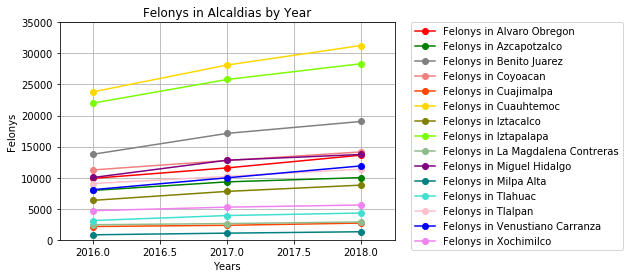

In [17]:
x_axis = np.arange(2016,2019,1)
delitos_ALVARO_OBREGON = [9890,11572,13625]
delitos_AZCAPOTZALCO = [7947,9327,10007]
delitos_BENITO_JUAREZ  = [13772,17129,19049]
delitos_COYOACAN = [11248,12768,14147]
delitos_CUAJIMALPA_DE_MORELOS = [2138,2335,2690]
delitos_CUAUHTEMOC = [23819,28132,31274]
delitos_IZTACALCO  = [6353,7791,8799]
delitos_IZTAPALAPA  = [22010,25804,28340]
delitos_LA_MAGDALENA_CONTRERAS = [2425,2615,2872]
delitos_MIGUEL_HIDALGO = [10029,12810,13736]
delitos_MILPA_ALTA = [806,1071,1297]
delitos_TLAHUAC = [3104,3904,4308]
delitos_TLALPAN = [9057,10200,11379]
delitos_VENUSTIANO_CARRANZA = [8073,9976,11893]
delitos_XOCHIMILCO = [4689,5256,5598]


ALVARO_OBREGON = plt.plot(x_axis,delitos_ALVARO_OBREGON, color = "red", marker = "o", label = "Felonys in Alvaro Obregon")
AZCAPOTZALCO = plt.plot(x_axis,delitos_AZCAPOTZALCO, color = "green", marker = "o", label = "Felonys in Azcapotzalco")
BENITO_JUAREZ = plt.plot(x_axis,delitos_BENITO_JUAREZ, color = "gray", marker = "o", label = "Felonys in Benito Juarez")
COYOACAN = plt.plot(x_axis,delitos_COYOACAN, color = "lightcoral", marker = "o", label = "Felonys in Coyoacan")
CUAJIMALPA_DE_MORELOS = plt.plot(x_axis,delitos_CUAJIMALPA_DE_MORELOS, color = "orangered",marker = "o", label = "Felonys in Cuajimalpa")
CUAUHTEMOC = plt.plot(x_axis,delitos_CUAUHTEMOC, color = "gold", marker = "o", label = "Felonys in Cuauhtemoc")
IZTACALCO = plt.plot(x_axis,delitos_IZTACALCO, color = "olive",marker = "o", label = "Felonys in Iztacalco")
IZTAPALAPA = plt.plot(x_axis,delitos_IZTAPALAPA, color = "lawngreen", marker = "o", label = "Felonys in Iztapalapa")
LA_MAGDALENA_CONTRERAS = plt.plot(x_axis,delitos_LA_MAGDALENA_CONTRERAS, marker = "o", color = "darkseagreen", label = "Felonys in La Magdalena Contreras")
MIGUEL_HIDALGO = plt.plot(x_axis,delitos_MIGUEL_HIDALGO, color = "purple", marker = "o", label = "Felonys in Miguel Hidalgo")
MILPA_ALTA = plt.plot(x_axis,delitos_MILPA_ALTA, color = "teal", marker = "o", label = "Felonys in Milpa Alta")
TLAHUAC = plt.plot(x_axis,delitos_TLAHUAC, color = "turquoise", marker = "o", label = "Felonys in Tlahuac")
TLALPAN = plt.plot(x_axis,delitos_TLALPAN, color = "pink", marker = "o", label = "Felonys in Tlalpan")
VENUSTIANO_CARRANZA = plt.plot(x_axis,delitos_VENUSTIANO_CARRANZA, color = "blue", marker = "o", label = "Felonys in Venustiano Carranza")
XOCHIMILCO = plt.plot(x_axis,delitos_XOCHIMILCO, color = "violet", marker = "o", label = "Felonys in Xochimilco")


plt.xlabel("Years")
plt.ylabel("Felonys")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0,35000)
plt.xlim(2015.75,2018.25)
plt.title("Felonys in Alcaldias by Year")
plt.grid()

plt.show()




In [18]:
x_axis = np.arange(2016,2019,1)
delitos_ALVARO_OBREGON = [1,11572,16386]
delitos_AZCAPOTZALCO = [1,2,12026]
delitos_BENITO_JUAREZ  = [1,2,16386]
delitos_COYOACAN = [1,2,16386]
delitos_CUAJIMALPA_DE_MORELOS = [1,2,16386]
delitos_CUAUHTEMOC = [1,2,16386]
delitos_IZTACALCO  = [1,2,16386]
delitos_IZTAPALAPA  = [1,2,16386]
delitos_LA_MAGDALENA_CONTRERAS = [1,2,16386]
delitos_MIGUEL_HIDALGO = [1,2,16386]
delitos_MILPA_ALTA = [1,2,16386]
delitos_TLAHUAC = [1,2,16386]
delitos_TLALPAN = [1,2,16386]
delitos_VENUSTIANO_CARRANZA = [1,2,16386]
delitos_XOCHIMILCO = [1,2,16386]

    
danger_h = plt.plot(x_axis,danger_drop, color = "red", label = "Danger Drop")
rail_h = plt.plot(x_axis,rail_gun, color = "green", label = "RailGun")
plt.xlabel("Coaster Runtime")
plt.ylabel("Speed (MPH)")
plt.legend(loc="higher right")
plt.ylim(0,100)
plt.title("Coaster Speed Over Time")
plt.grid()

plt.show()


NameError: name 'danger_drop' is not defined

In [19]:
total_delitos_2016 = Delitos_Alcaldia_2016["delito"].sum()
total_delitos_2016

135360

In [20]:
total_delitos_2017 = Delitos_Alcaldia_2017["delito"].sum()
total_delitos_2017

160690

In [21]:
total_delitos_2018 = Delitos_Alcaldia_2018["delito"].sum()
total_delitos_2018

179014

In [22]:
total_delitos_2019 = Delitos_Alcaldia_2019["delito"].sum()
total_delitos_2019

62259

In [23]:
años_total = {"Total delitos" : {'2016':total_delitos_2016,
           '2017':total_delitos_2017,
           '2018':total_delitos_2018,
              '2019':total_delitos_2019}}

In [24]:
años_total_df = pd.DataFrame(años_total)
años_total_df

,Total delitos
2016,135360
2017,160690
2018,179014
2019,62259


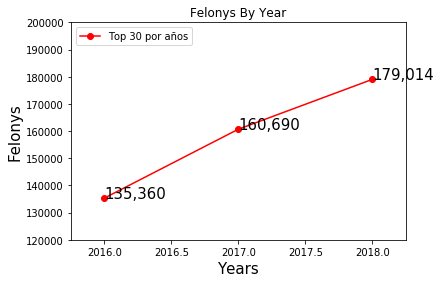

In [33]:
x_axis = np.arange(2016,2019,1)
points = [135360, 160690, 179014]
Delitos_año = plt.plot(x_axis,points, color = "red", marker ="o", label = "Top 30 por años")


plt.xlabel("Años")
plt.ylabel("Delitos")
plt.legend(loc="upper left", fontsize=10)
plt.ylabel('Felonys', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title("Felonys By Year")
plt.annotate('135,360', xy=(2016, 135360), fontsize= 15)             
plt.annotate('160,690', xy=(2017, 160690), fontsize= 15) 
plt.annotate('179,014', xy=(2018, 179014), fontsize= 15)
plt.ylim(120000,200000)
plt.xlim(2015.75,2018.25)

plt.show()
     

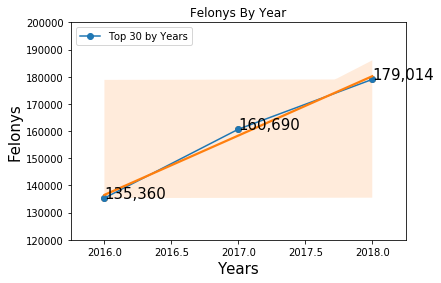

In [32]:
data = pd.DataFrame({'year': [2016, 2017, 2018],
                     'value': [135360, 160690, 179014]})

data.plot(x = "year", y = "value", marker="o", label = "Top 30 by Years", fontsize = 10)
sns.regplot(x='year',y='value', data=data) 
plt.legend(loc="upper left", fontsize=10)
plt.ylabel('Felonys', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title("Felonys By Year")
plt.annotate('135,360', xy=(2016, 135360), fontsize= 15)             
plt.annotate('160,690', xy=(2017, 160690), fontsize= 15) 
plt.annotate('179,014', xy=(2018, 179014), fontsize= 15)
plt.ylim(120000,200000)
plt.xlim(2015.75,2018.25)
plt.show()


In [ ]:
186777